In [1]:
# 1. Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# 2. Load and Normalize Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# 3. Class Names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [4]:
# 4. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [5]:
# 5. Model Architecture
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Fully Connected
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 6. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 7. Callbacks
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cifar10_model.h5", save_best_only=True)

In [8]:
# 8. Train the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, checkpoint])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3386 - loss: 2.1345

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 52ms/step - accuracy: 0.3387 - loss: 2.1340 - val_accuracy: 0.5240 - val_loss: 1.3728
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5499 - loss: 1.2542

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5500 - loss: 1.2541 - val_accuracy: 0.6548 - val_loss: 0.9785
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6359 - loss: 1.0307 - val_accuracy: 0.6549 - val_loss: 1.0423
Epoch 4/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6764 - loss: 0.9199

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6764 - loss: 0.9199 - val_accuracy: 0.6835 - val_loss: 0.9546
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7063 - loss: 0.8438

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7063 - loss: 0.8438 - val_accuracy: 0.7411 - val_loss: 0.7603
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7234 - loss: 0.7920 - val_accuracy: 0.7346 - val_loss: 0.7640
Epoch 7/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7386 - loss: 0.7516

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7386 - loss: 0.7515 - val_accuracy: 0.7626 - val_loss: 0.7192
Epoch 8/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7588 - loss: 0.6981

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7588 - loss: 0.6981 - val_accuracy: 0.8034 - val_loss: 0.5895
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7666 - loss: 0.6795 - val_accuracy: 0.7724 - val_loss: 0.6944
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7731 - loss: 0.6541 - val_accuracy: 0.7796 - val_loss: 0.6527
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7821 - loss: 0.6364

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7821 - loss: 0.6364 - val_accuracy: 0.8044 - val_loss: 0.5793
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7898 - loss: 0.6056

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7898 - loss: 0.6056 - val_accuracy: 0.8116 - val_loss: 0.5601
Epoch 13/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7950 - loss: 0.5978 - val_accuracy: 0.8108 - val_loss: 0.5728
Epoch 14/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7975 - loss: 0.5818 - val_accuracy: 0.8040 - val_loss: 0.6031
Epoch 15/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8090 - loss: 0.5573

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8090 - loss: 0.5573 - val_accuracy: 0.8280 - val_loss: 0.5146
Epoch 16/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.8088 - loss: 0.5497 - val_accuracy: 0.8271 - val_loss: 0.5214
Epoch 17/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8168 - loss: 0.5321

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8168 - loss: 0.5321 - val_accuracy: 0.8435 - val_loss: 0.4661
Epoch 18/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8194 - loss: 0.5216 - val_accuracy: 0.8048 - val_loss: 0.5935
Epoch 19/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8193 - loss: 0.5158 - val_accuracy: 0.8302 - val_loss: 0.5059
Epoch 20/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.8257 - loss: 0.5046 - val_accuracy: 0.8419 - val_loss: 0.4884


In [9]:
# 9. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8413 - loss: 0.4707

Test Accuracy: 84.35%


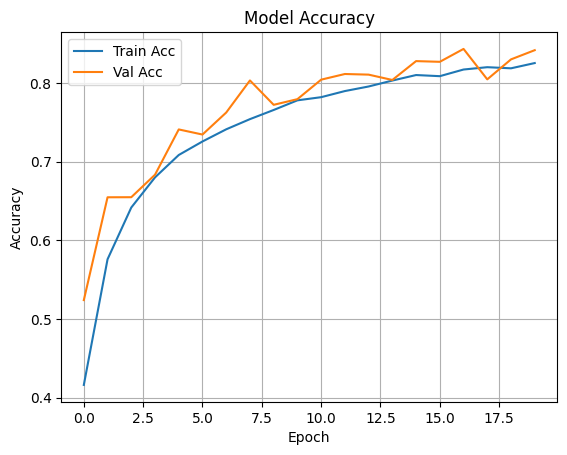

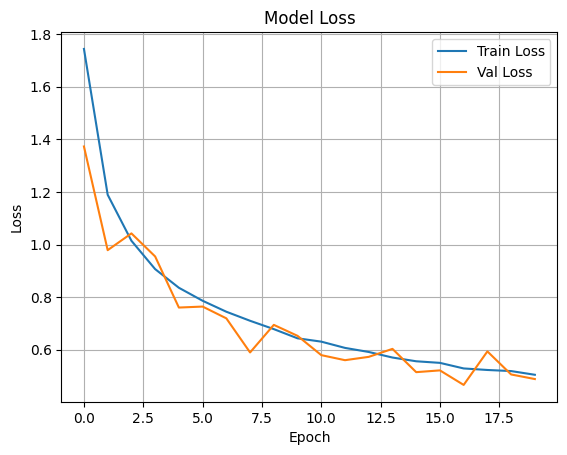

In [10]:
# 10. Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()